In [1]:
import os 
import ray 
from dotenv import load_dotenv; load_dotenv()
import warnings; warnings.filterwarnings("ignore")

In [2]:
if ray.is_initialized():
    ray.shutdown()
ray.init()

2023-11-07 23:30:02,901	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.11.5
Ray version:,2.7.0
Dashboard:,http://127.0.0.1:8265


In [3]:
ray.cluster_resources()

{'object_store_memory': 984171724.0,
 'memory': 1968343451.0,
 'CPU': 8.0,
 'node:192.168.1.8': 1.0,
 'node:__internal_head__': 1.0,
 'GPU': 1.0,
 'accelerator_type:G': 1.0}

In [5]:
num_workers=6 
resources_per_worker={"CPU":1,"GPU":0}

## 🔢 Data ingestion

In [6]:
import pandas as pd 

In [7]:
DATASET_LOC="https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv"
df=pd.read_csv(DATASET_LOC)
df.head()


,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


## ✂️ Data splitting

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df.tag.value_counts()

tag
natural-language-processing    310
computer-vision                285
other                          106
mlops                           63
Name: count, dtype: int64

In [11]:
test_size=0.2 
train_df,val_df=train_test_split(df,stratify=df.tag,test_size=test_size,random_state=1234)

In [12]:
len(train_df)/len(val_df)

3.9934640522875817

## 🔍 Exploratory Data Analysis (EDA)

In [28]:
from collections import Counter
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set_theme()
import warnings; warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS

In [29]:
all_tags=Counter(df.tag)
all_tags.most_common()

[('natural-language-processing', 310),
 ('computer-vision', 285),
 ('other', 106),
 ('mlops', 63)]

In [30]:
tags, tag_counts = zip(*all_tags.most_common())
plt.figure(figsize=(10, 3))

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

In [35]:
x=[]
for i in range(len(tags)):
    x.append(tags[i])

y=[]
for i in range(len(tag_counts)):
    y.append(tag_counts[i])

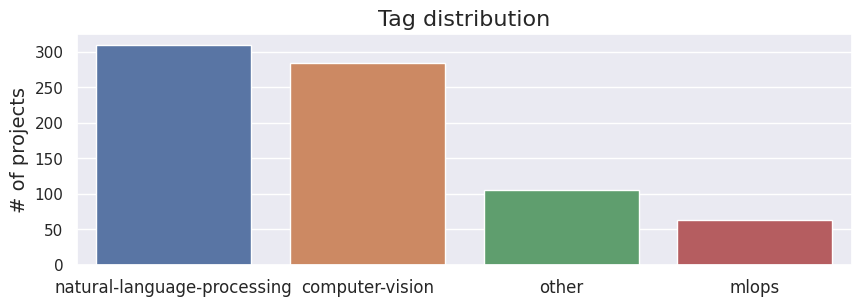

In [38]:
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=x, y=y)
ax.set_xticklabels(tags, rotation=0, fontsize=12)
plt.title("Tag distribution", fontsize=16)
plt.ylabel("# of projects", fontsize=14)
plt.show()

tuple

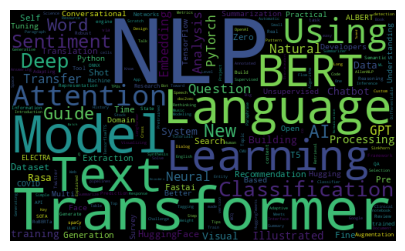

In [39]:
# Most frequent tokens for each tag
tag="natural-language-processing"
plt.figure(figsize=(10, 3))
subset = df[df.tag==tag]
text = subset.title.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text))
plt.axis("off")
plt.imshow(cloud)

## ✨ Data Preprocessing